In [1]:
from seldon_deploy_sdk.rest import ApiException

from seldon_deploy_sdk import MonitorApi,DeploymentFeatureData, Configuration, ApiClient
from seldon_deploy_sdk.auth import OIDCAuthenticator

In [2]:
INGRESS = "http://localhost:8000"

config = Configuration()
config.host = f"{INGRESS}/seldon-deploy/api/v1alpha1"

config.oidc_server = f"{INGRESS}/auth/realms/deploy-realm"
config.oidc_client_id = "sd-api"
config.oidc_client_secret = "sd-api-secret"
config.auth_method = "client_credentials"
auth = OIDCAuthenticator(config)
config.access_token = auth.authenticate()


In [3]:
api_client = ApiClient(configuration=config,authenticator=auth)
api_instance = MonitorApi(api_client)

In [4]:
deployment_name="income-classifier"
deployment_namespace="seldon"
feature_data = DeploymentFeatureData(
    feature="Education",
    interaction="request",
    aggregate_over_time=True
)
try:
    # Get feature distributions
    api_response = api_instance.seldon_deployment_feature_distributions(deployment_name,deployment_namespace,feature_data)
except ApiException as e:
    print(f"Couldn't fetch distributions: {e}")

In [5]:
groups = []
counts = []
for bucket in api_response.distribution.buckets:
    groups.append(bucket.key)
    counts.append(bucket.count)

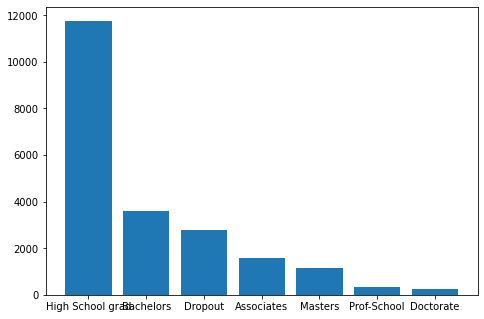

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(groups,counts)
plt.show()